# Model V4 Active Cases

v4

In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor


%matplotlib inline

INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures                               min   ... mean  ... max   ... unique
 1 Healthcare specialisation                  0.000 ... 0.038 ... 1.000 ... [0. 1.]
 2 Mask wearing over 70%                      0.000 ... 0.083 ... 1.000 ... [0. 1.]
 3 Gatherings limited to 1000                 0.000 ... 0.240 ... 1.000 ... [0. 1.]
 4 Gatherings limited to 100                  0.000 ... 0.215 ... 1.000 ... [0. 1.]
 5 Gatherings limited to 10                   0.000 ... 0.114 ... 1.000 ... [0. 1.]
 6 Business suspended - some                  0.000 ... 0.250 ... 1.000 ... [0. 1.]
 7 Business suspended - many                  0.000 ... 0.167 ... 1.000 ... [0. 1.]
 8 Schools and universities closed            0.000 ... 0.322 ... 1.

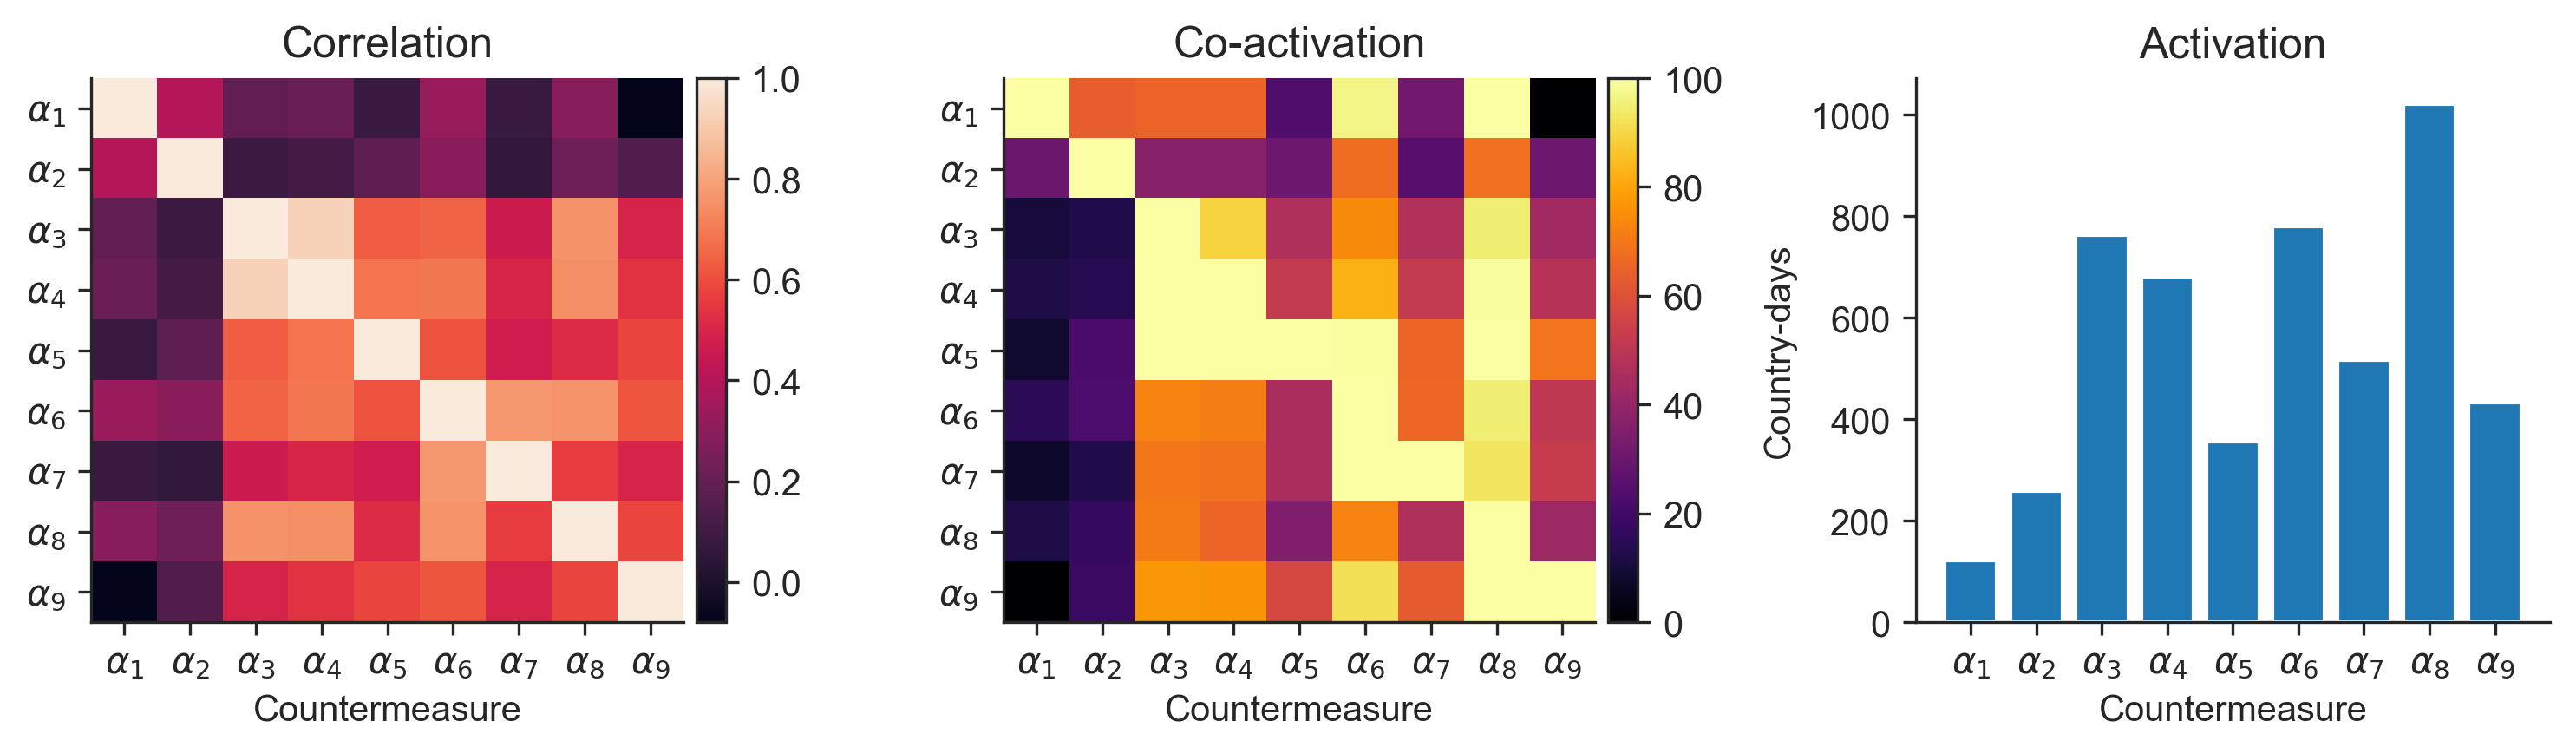

In [125]:
regions = ['AT', 'BE', 'CH', 'CZ', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR','HU', 'IE', 'IT', 'NL', 'PL', 'RO', 'RS', 'RU', 'SE']
# Same, outside Europe
regions += ['CN-HK', 'EG', 'IL', 'JP', 'KR', 'MX', 'MY', 'MA']


features = ['Healthcare specialisation', 
             'Mask wearing over 70%',
 'Gatherings limited to 1000',    
 'Gatherings limited to 100',
 'Gatherings limited to 10',
 'Business suspended - some',
 'Business suspended - many',
 'Schools and universities closed',
 'General curfew'
 ]

dp = DataPreprocessor(end_date="2020-04-21")
data = dp.preprocess_data("../../data", regions, features, selected_cm_set="countermeasures-model-boolean_Gat3Bus2SchCurHespMa.csv")

In [130]:
with cm_effect.models.CMDeathModelFlexibleV2(data) as model:
    model.build_cm_reduction_exp_gamma_prior()
    model.build_region_growth_prior()
    model.build_region_reliability_prior()
    model.build_rates()
    model.build_output_model()

/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/pymc3/model.py:1430: ImputationWarning: Data in Observed contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
INFO (theano.gof.compilelock): Refreshing lock /Users/mrinank/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.7.4-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /Users/mrinank/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.7.4-64/lock_dir/lock


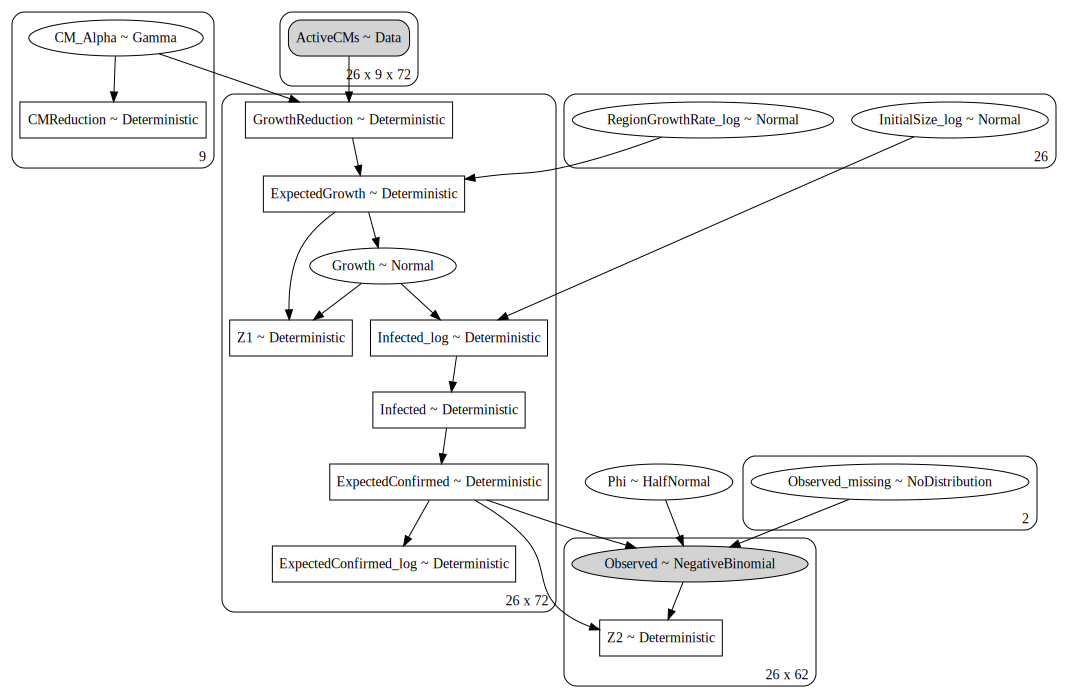

In [131]:
pm.model_to_graphviz(model).render("deathmodelV2")
pm.model_to_graphviz(model)

In [132]:
model.run(2000)

CM_Alpha_log__             -12.77
RegionGrowthRate_log         7.41
Phi_log__                   -0.77
Growth                    6900.63
InitialSize_log            -23.89
Observed_missing             0.00
Observed               -252871.73
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
INFO:pymc3:CompoundStep
>NUTS: [InitialSize_log, Growth, Phi, RegionGrowthRate_log, CM_Alpha]
INFO:pymc3:>NUTS: [InitialSize_log, Growth, Phi, RegionGrowthRate_log, CM_Alpha]
>Metropolis: [Observed_missing]
INFO:pymc3:>Metropolis: [Observed_missing]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:41:03<00:00,  1.21s/draws]
The acceptance probability does not match the target. It is 0.9516465797725573, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not c

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/heldout_validation/out


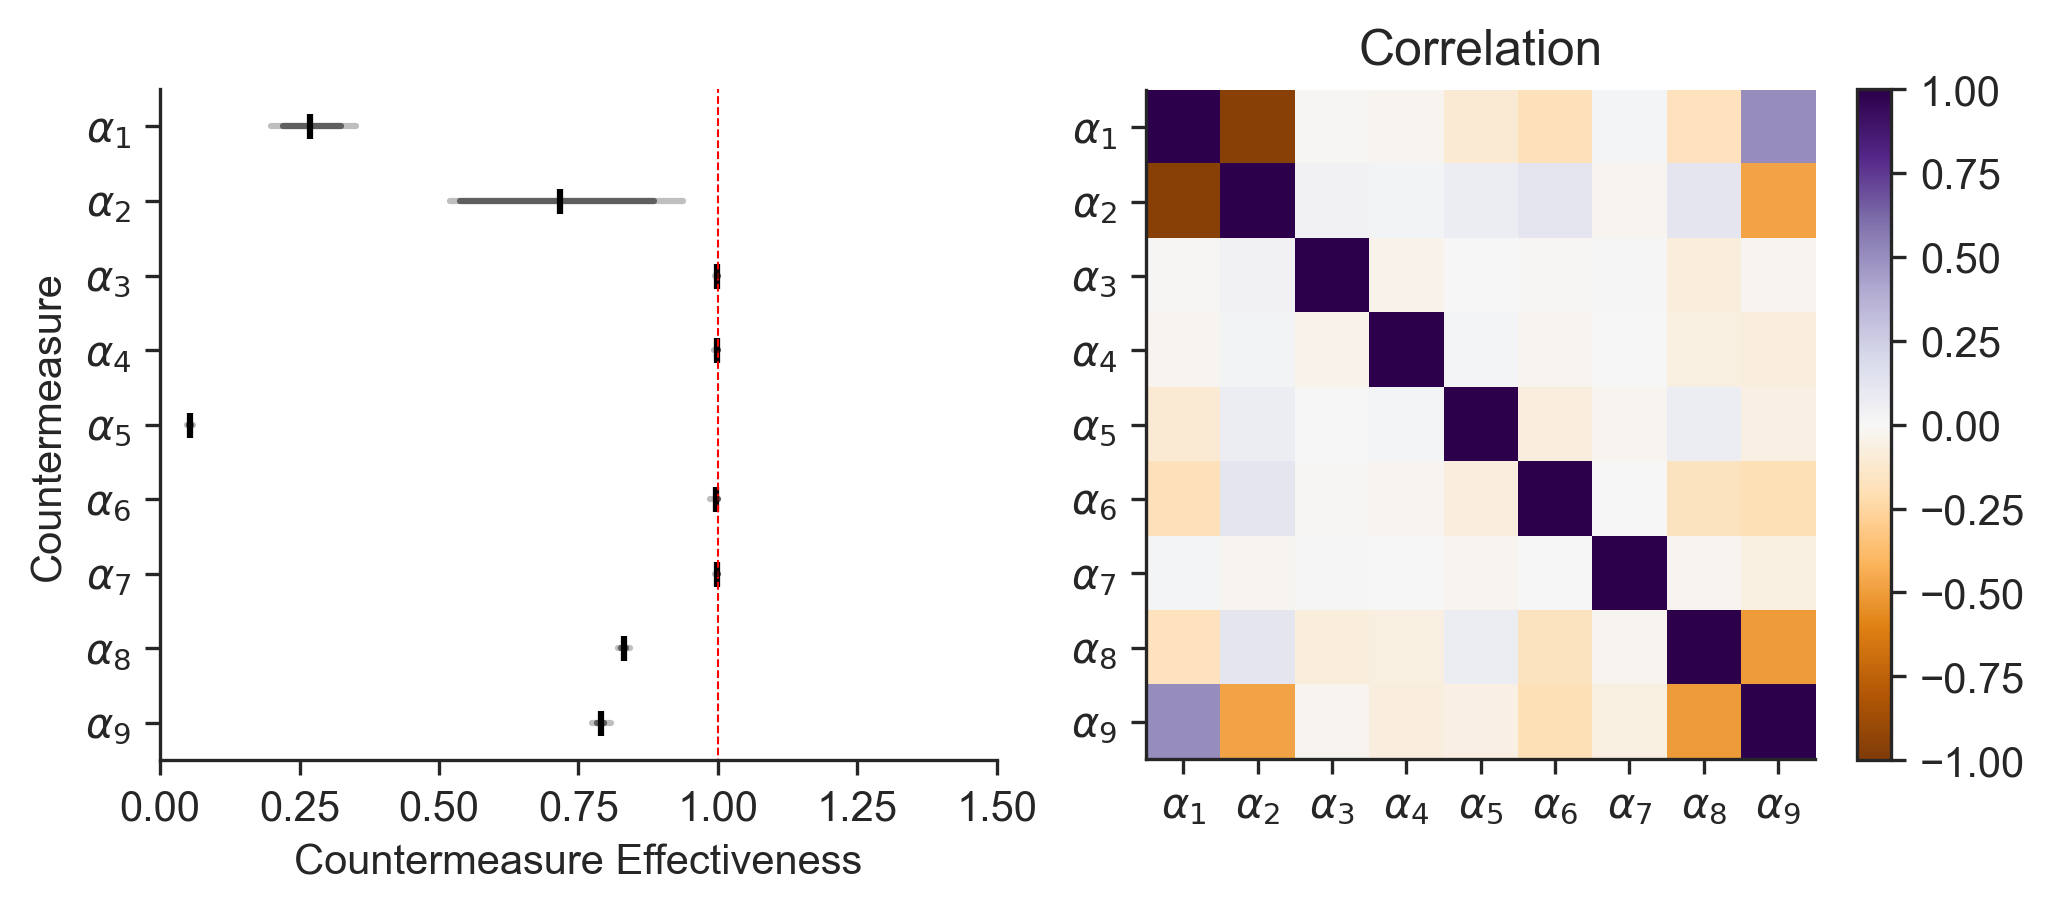

In [134]:
model.plot_effect(x_min=0)

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/heldout_validation/out
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/heldout_validation/out
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/heldout_validation/out
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/heldout_validation/out
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/heldout_validation/out
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/heldout_validation/out


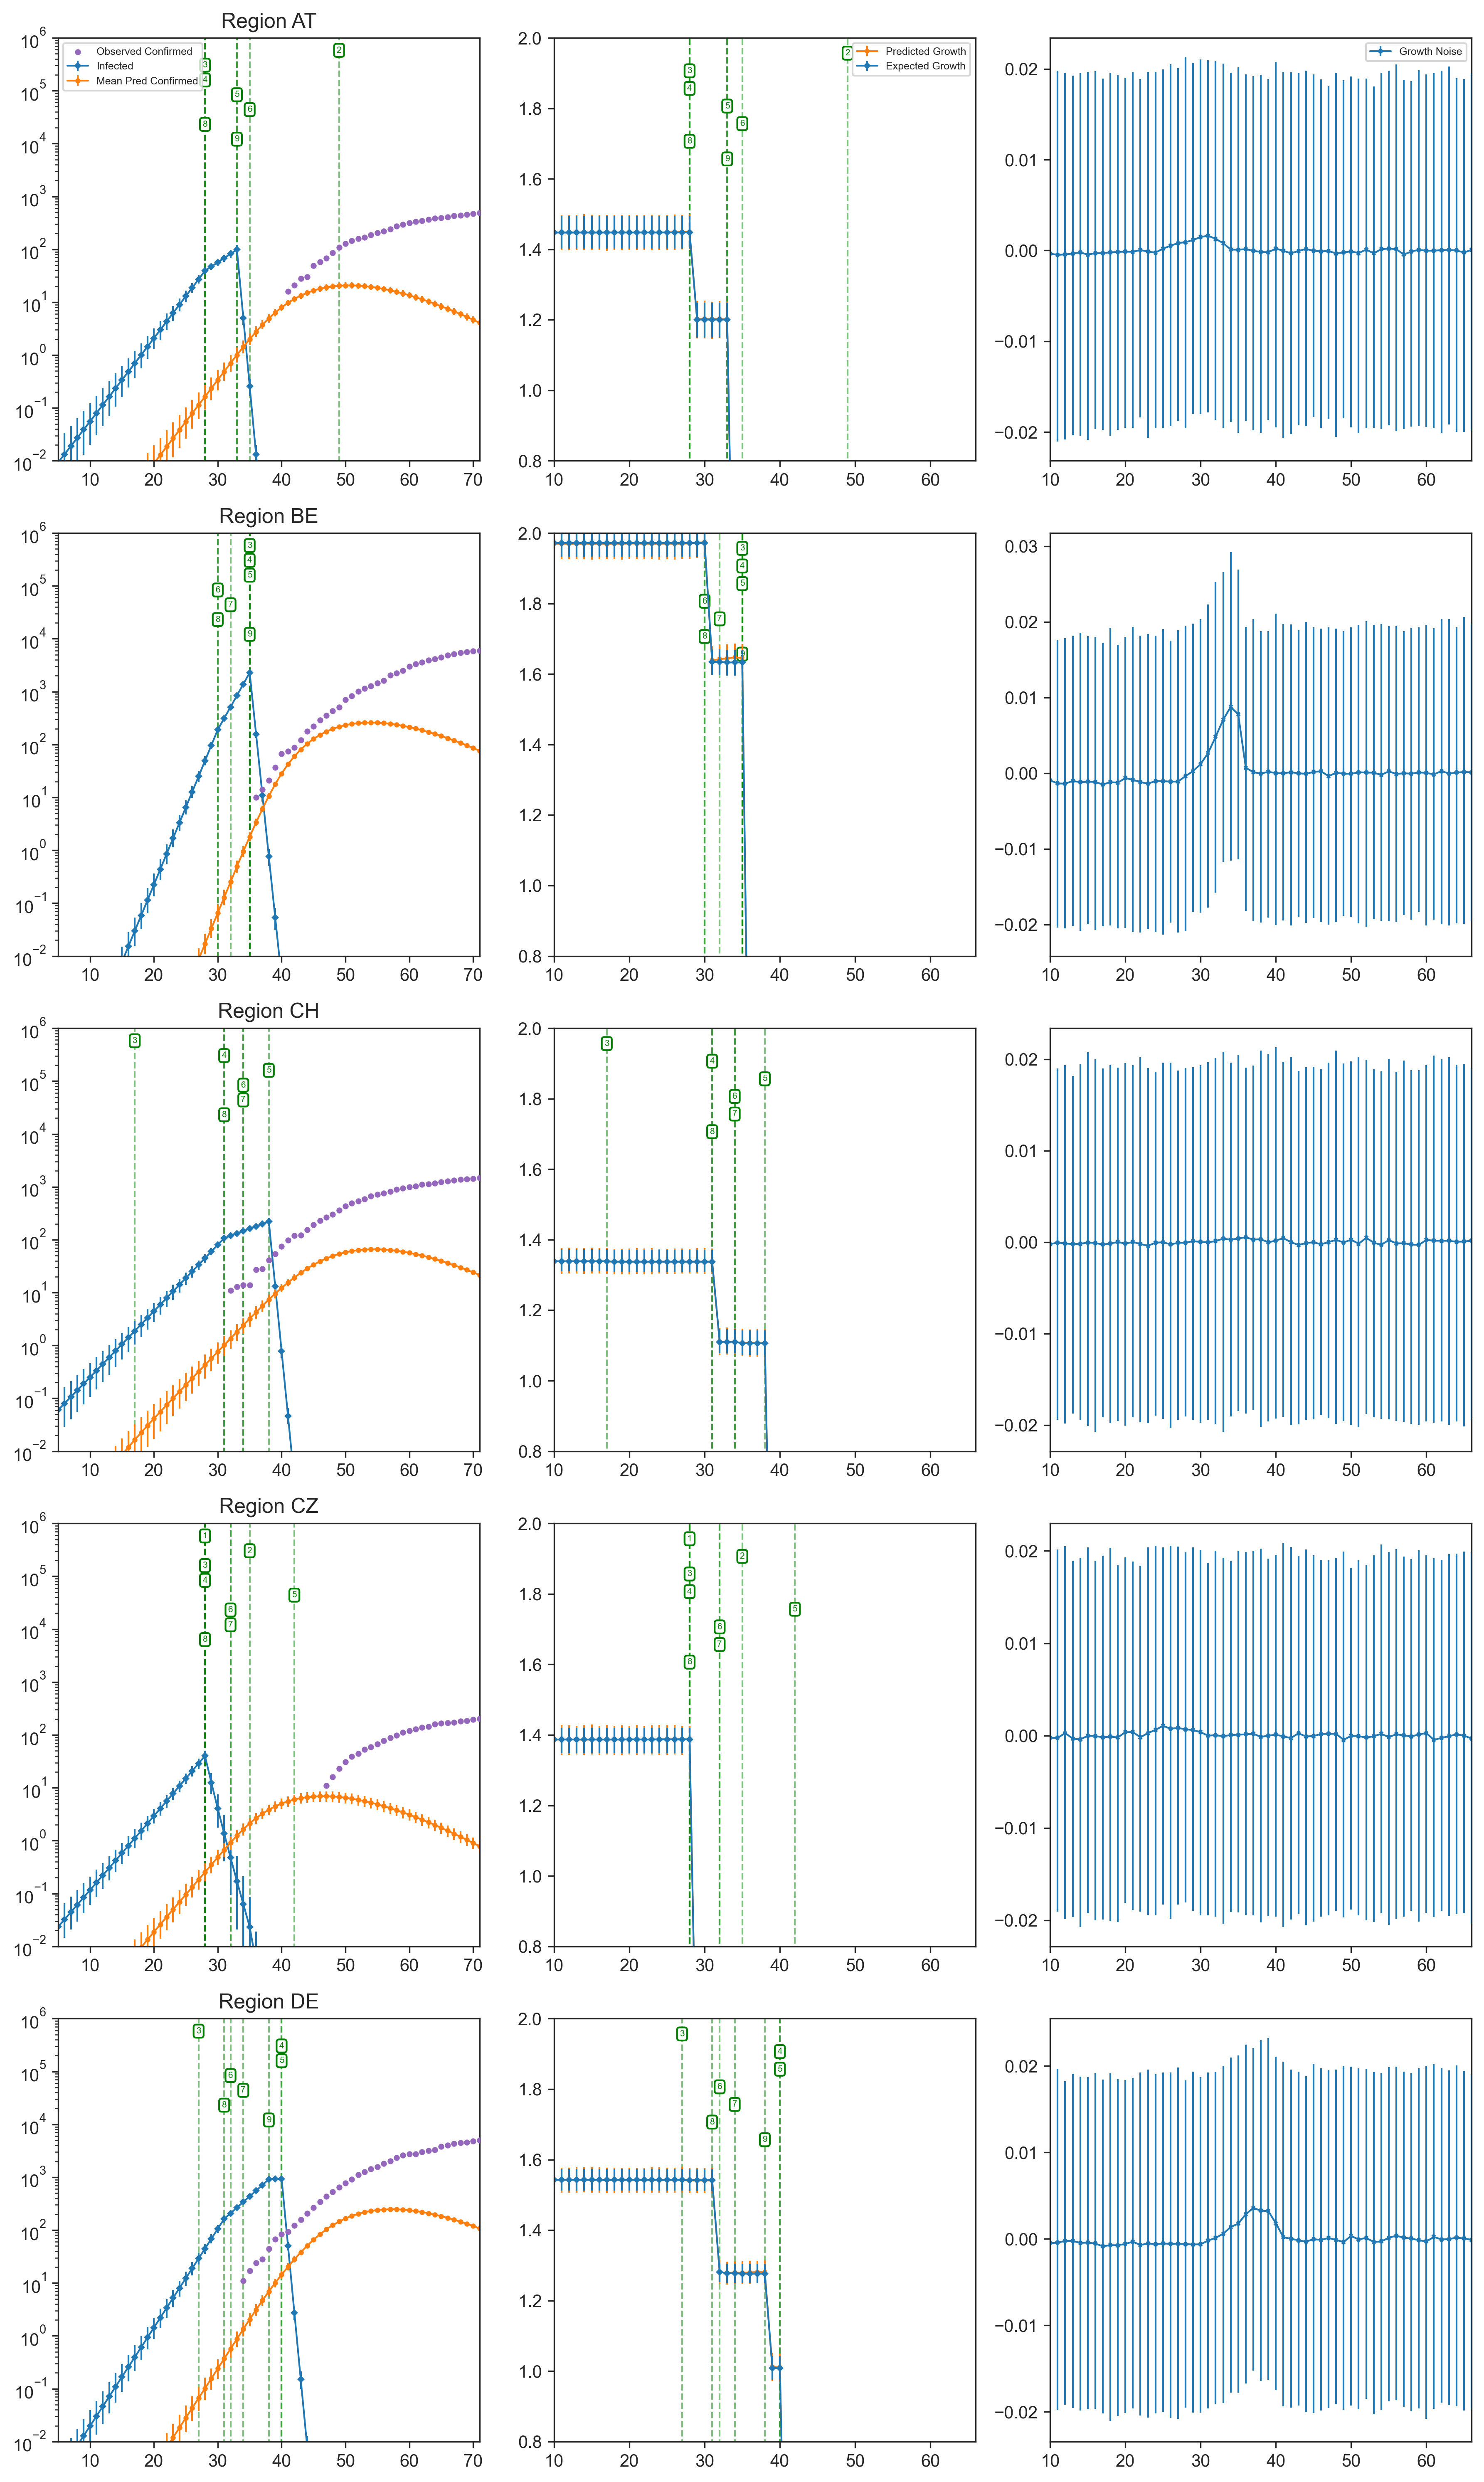

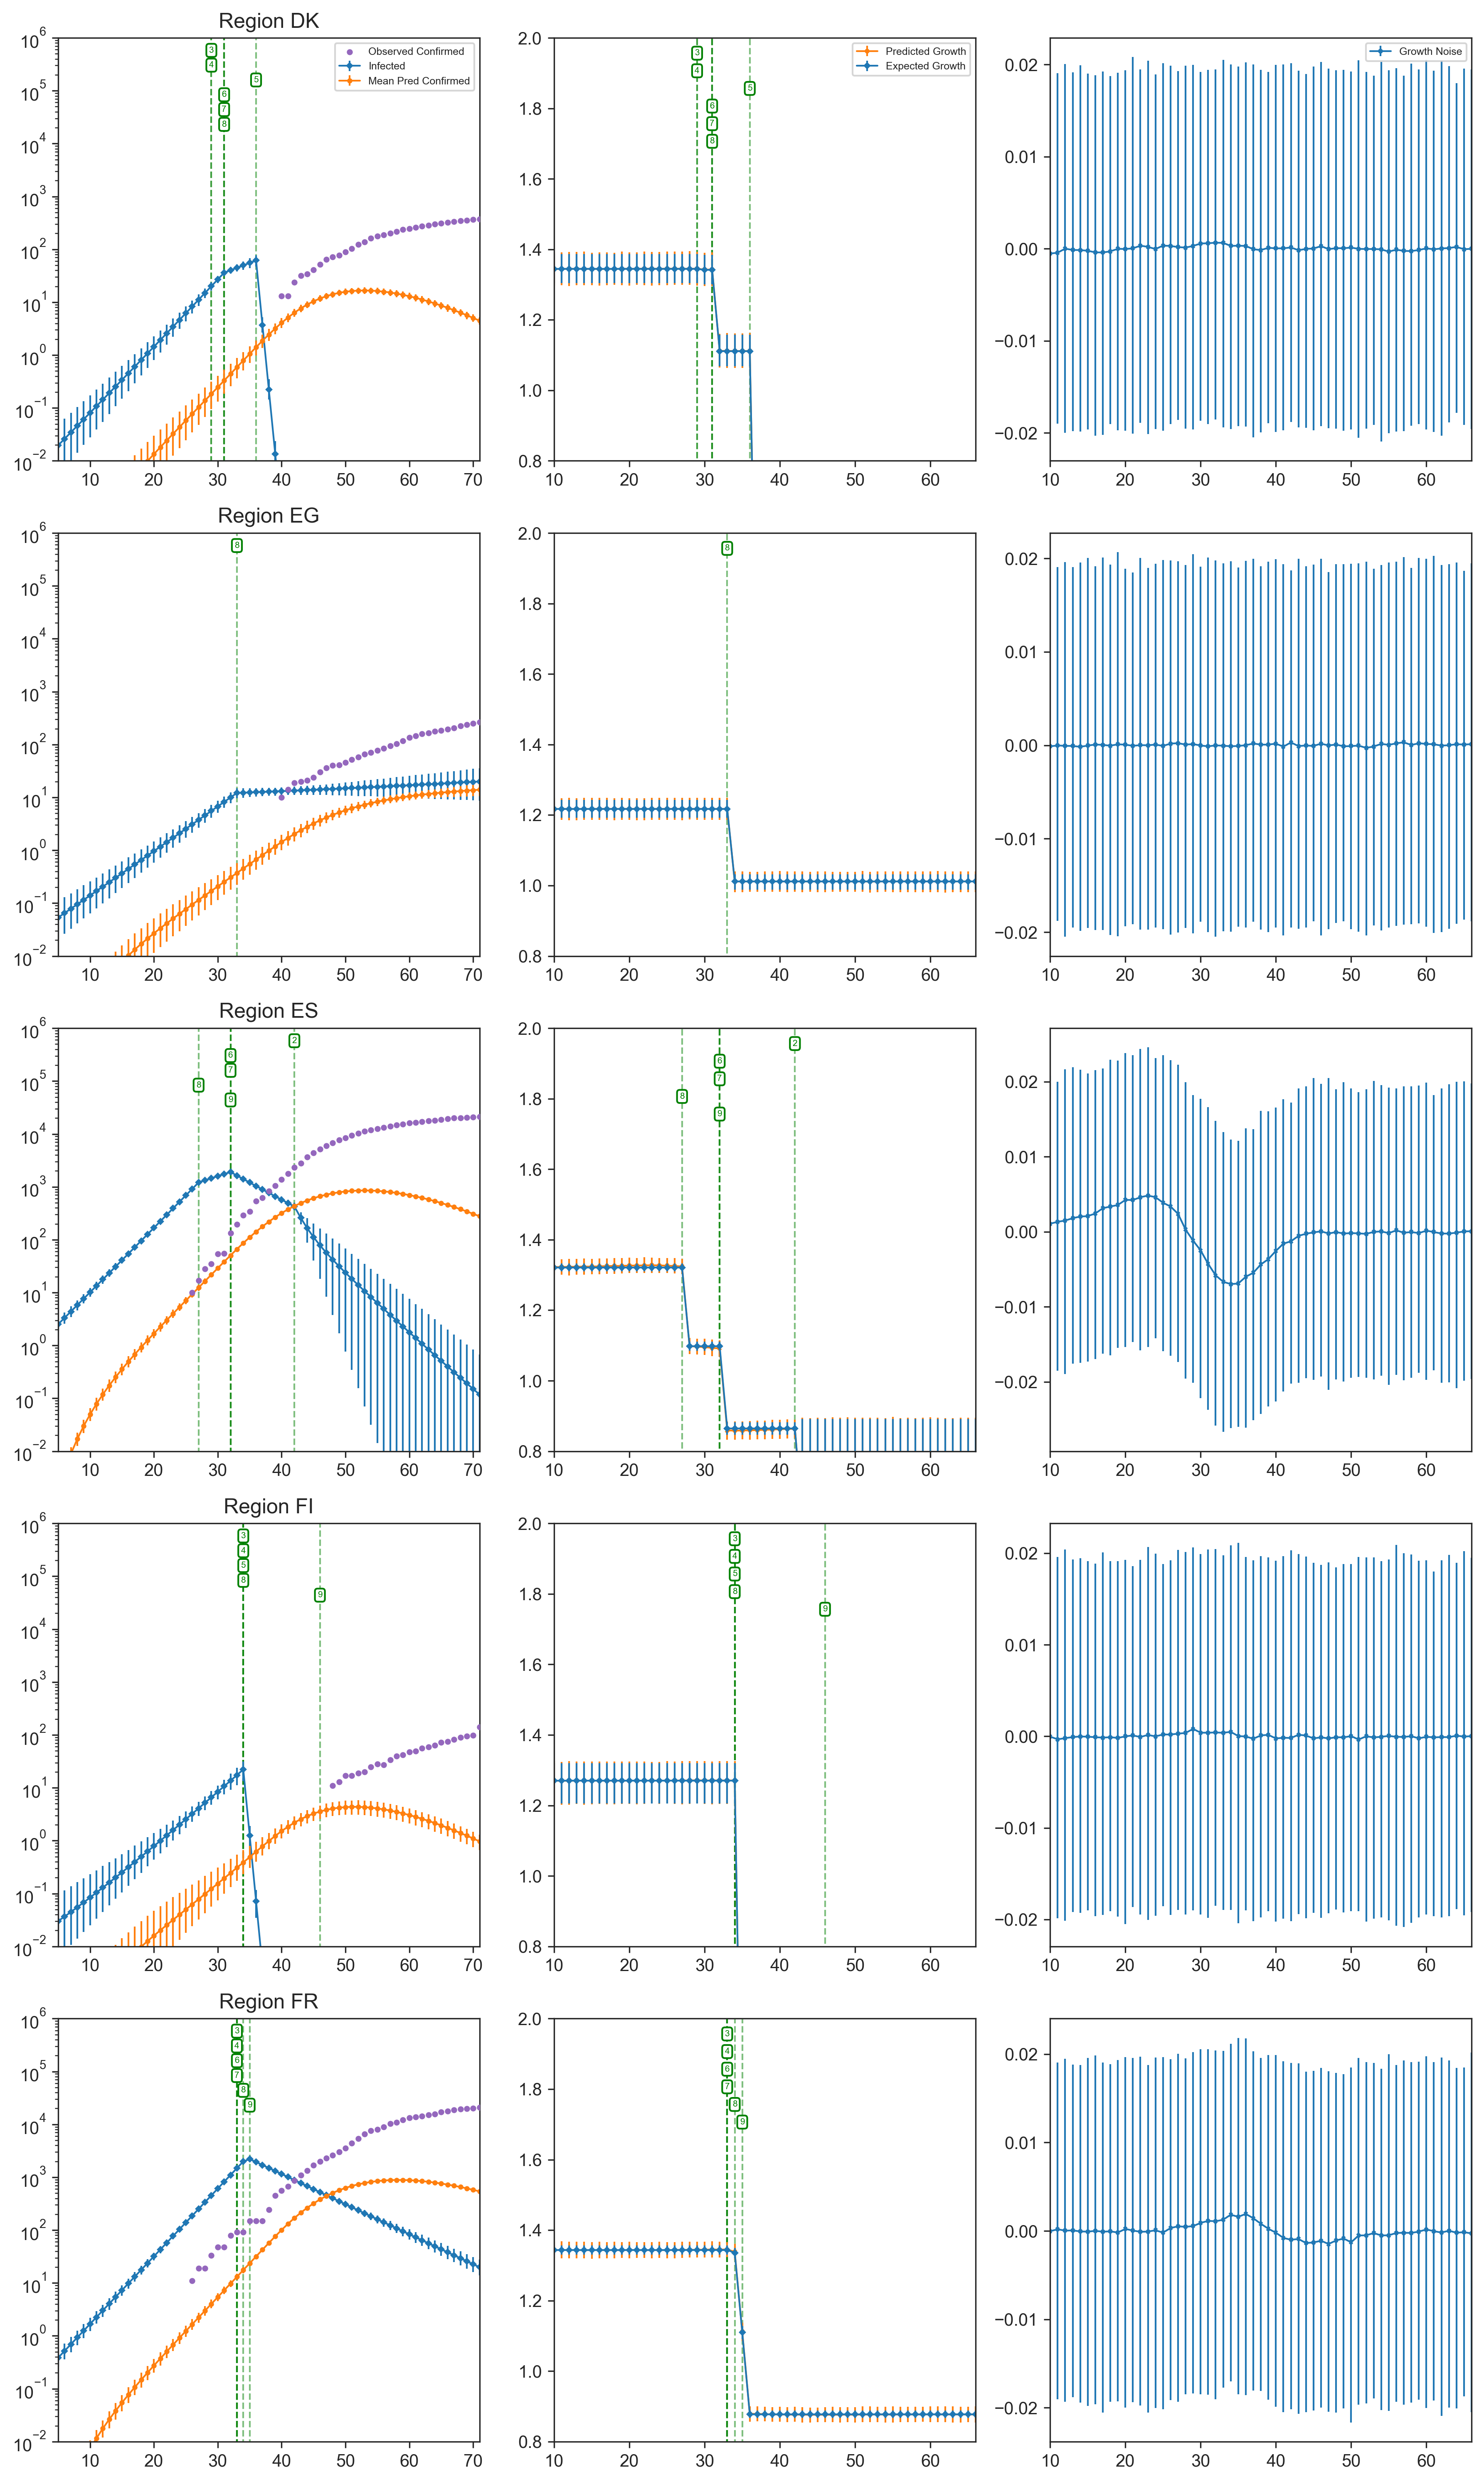

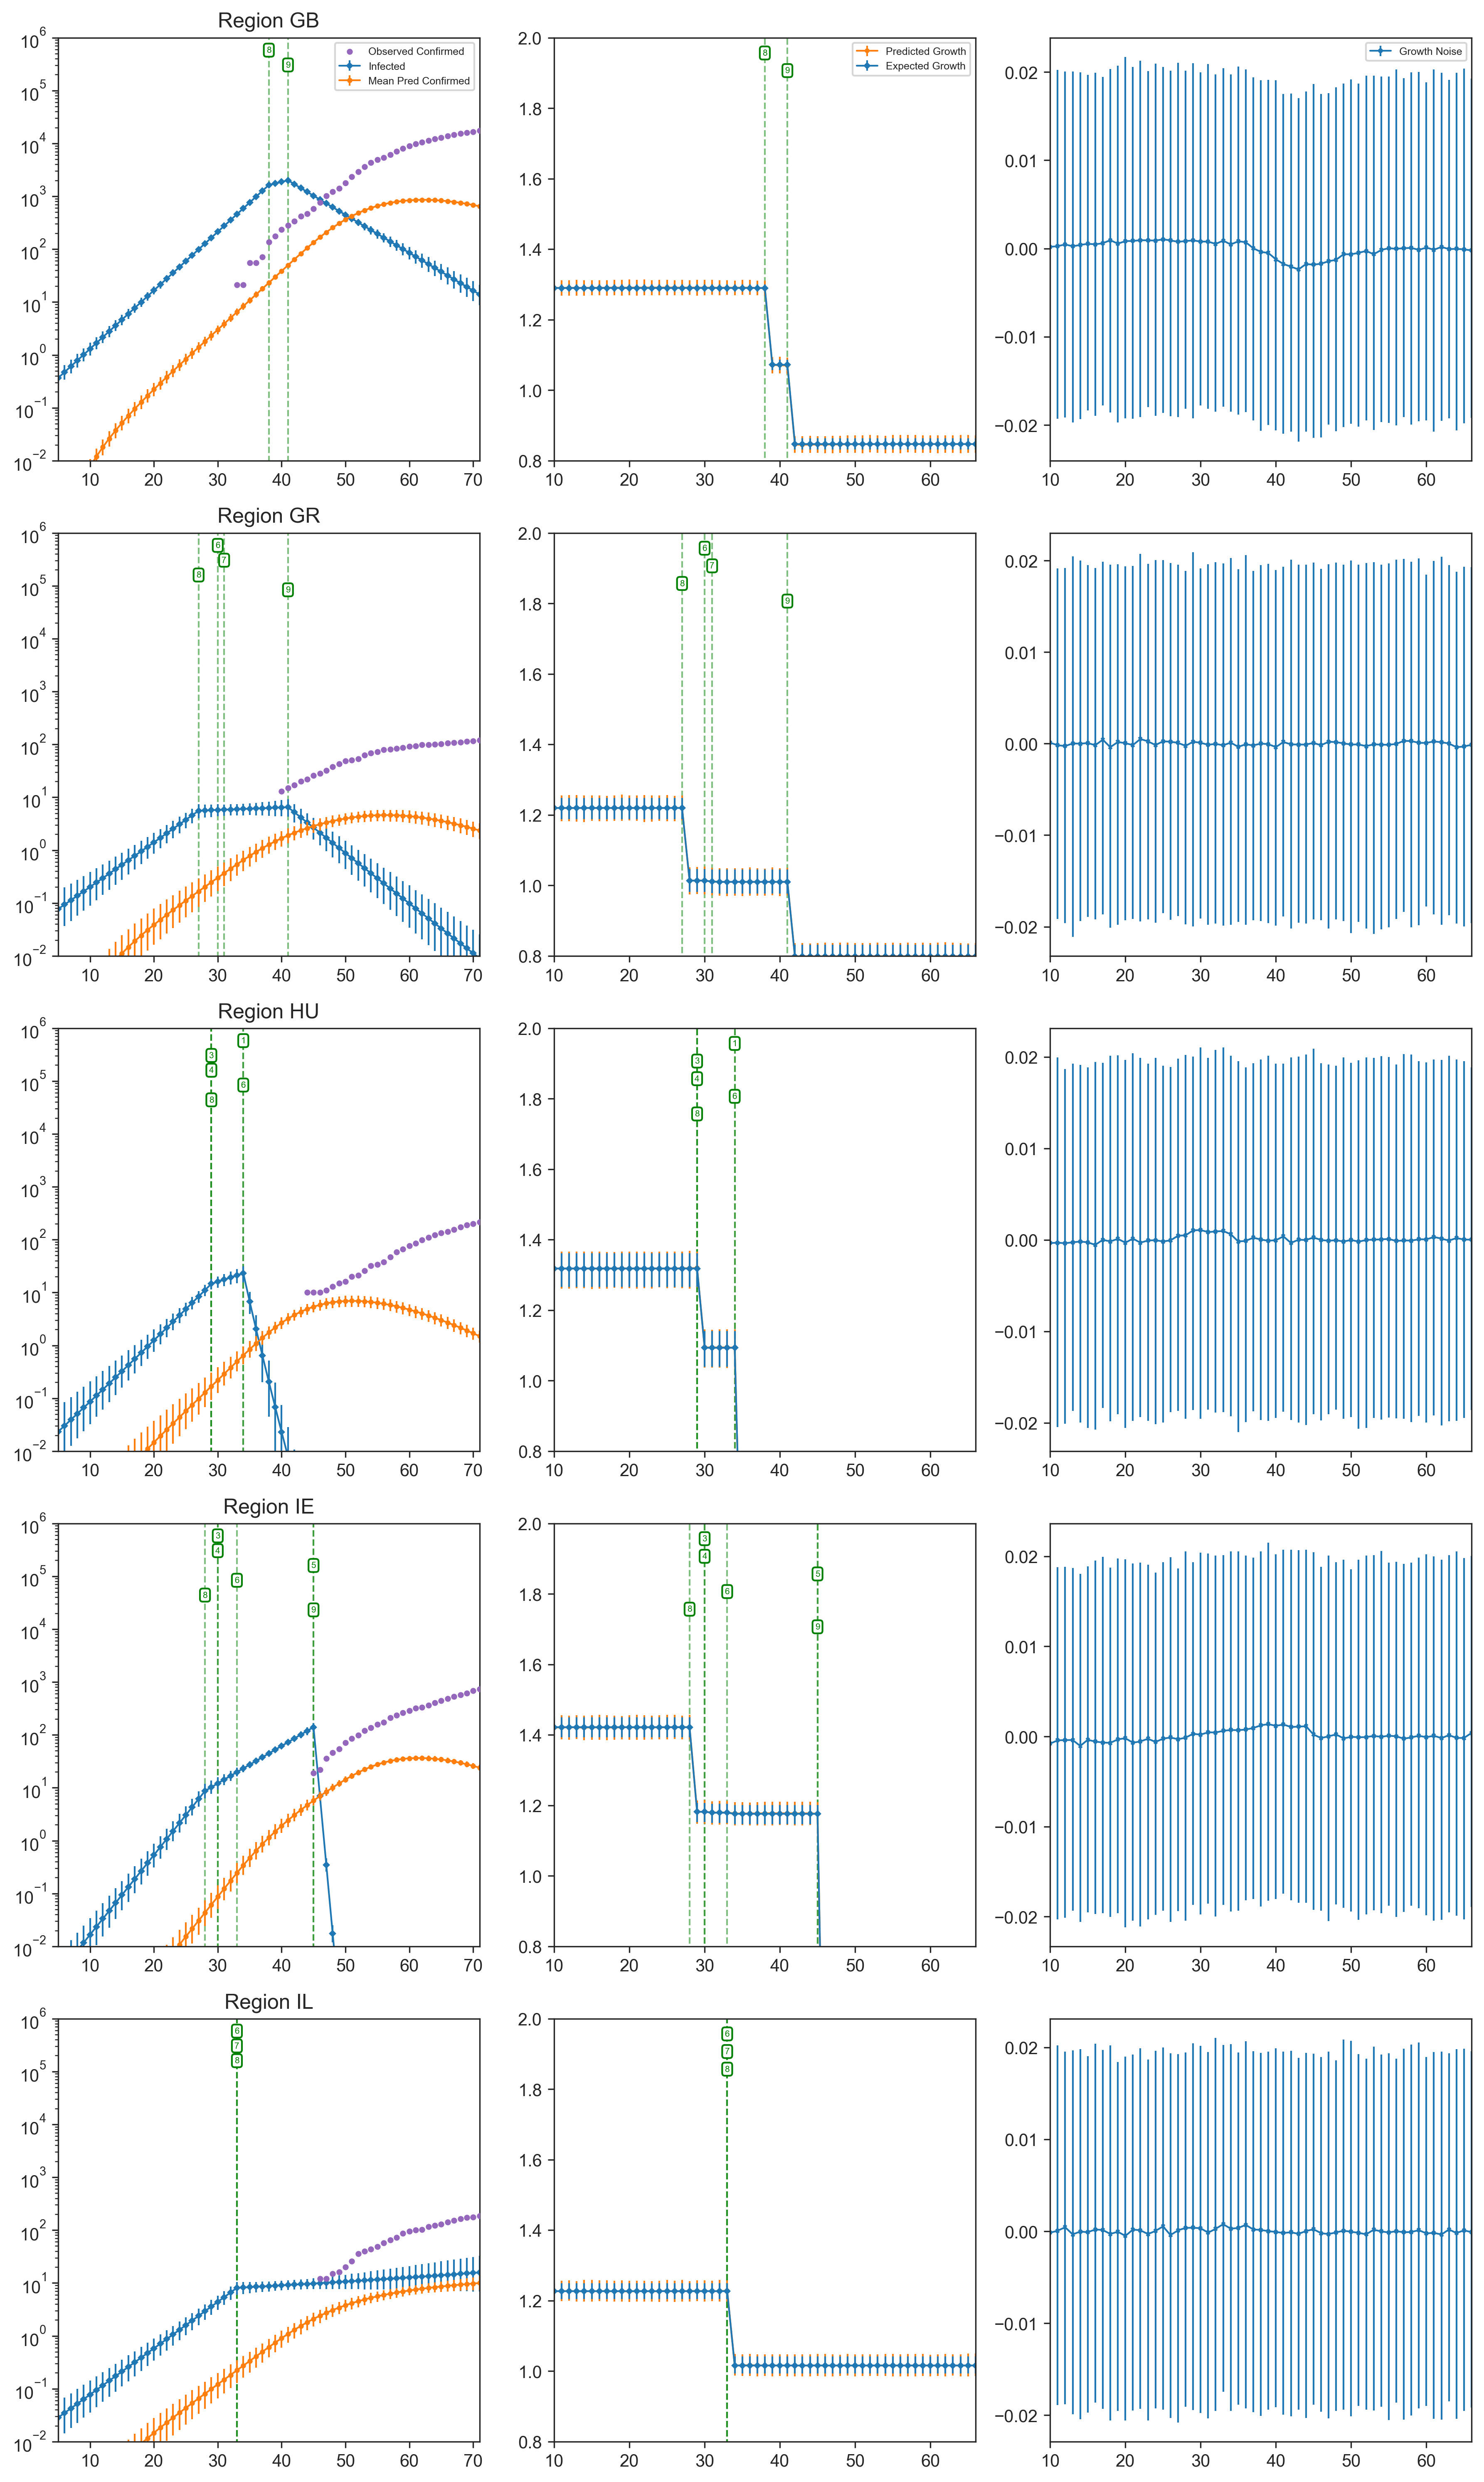

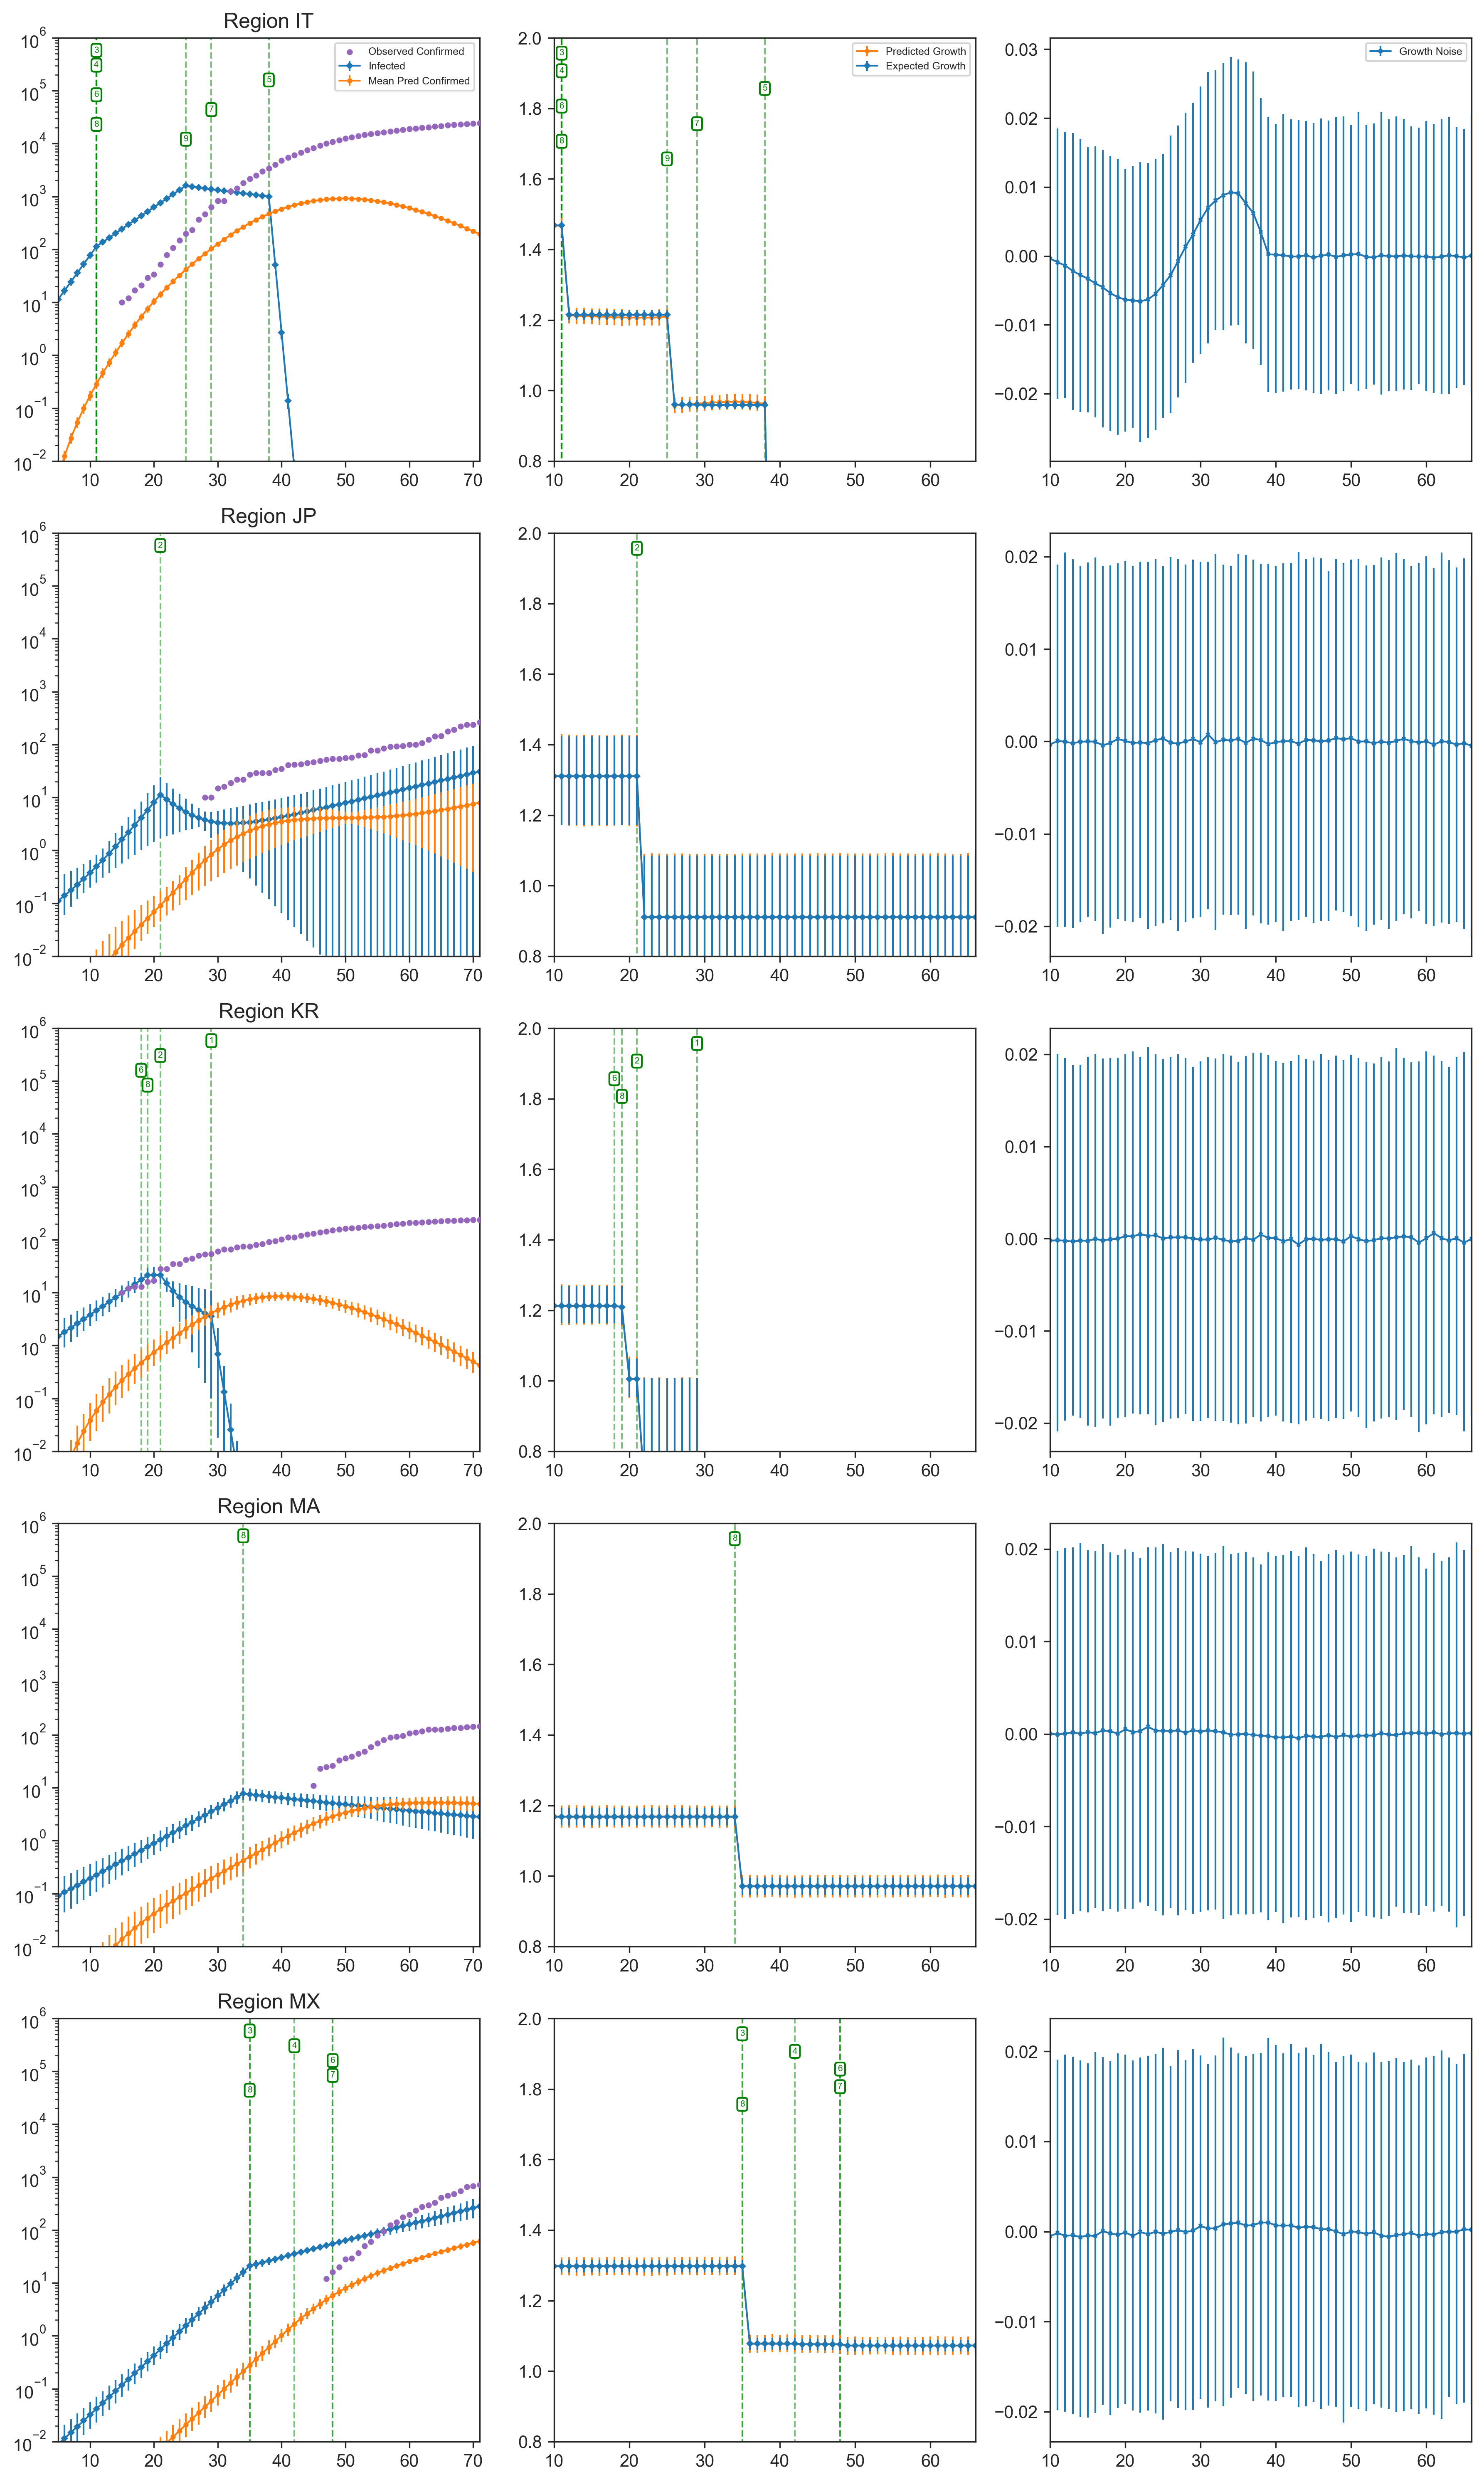

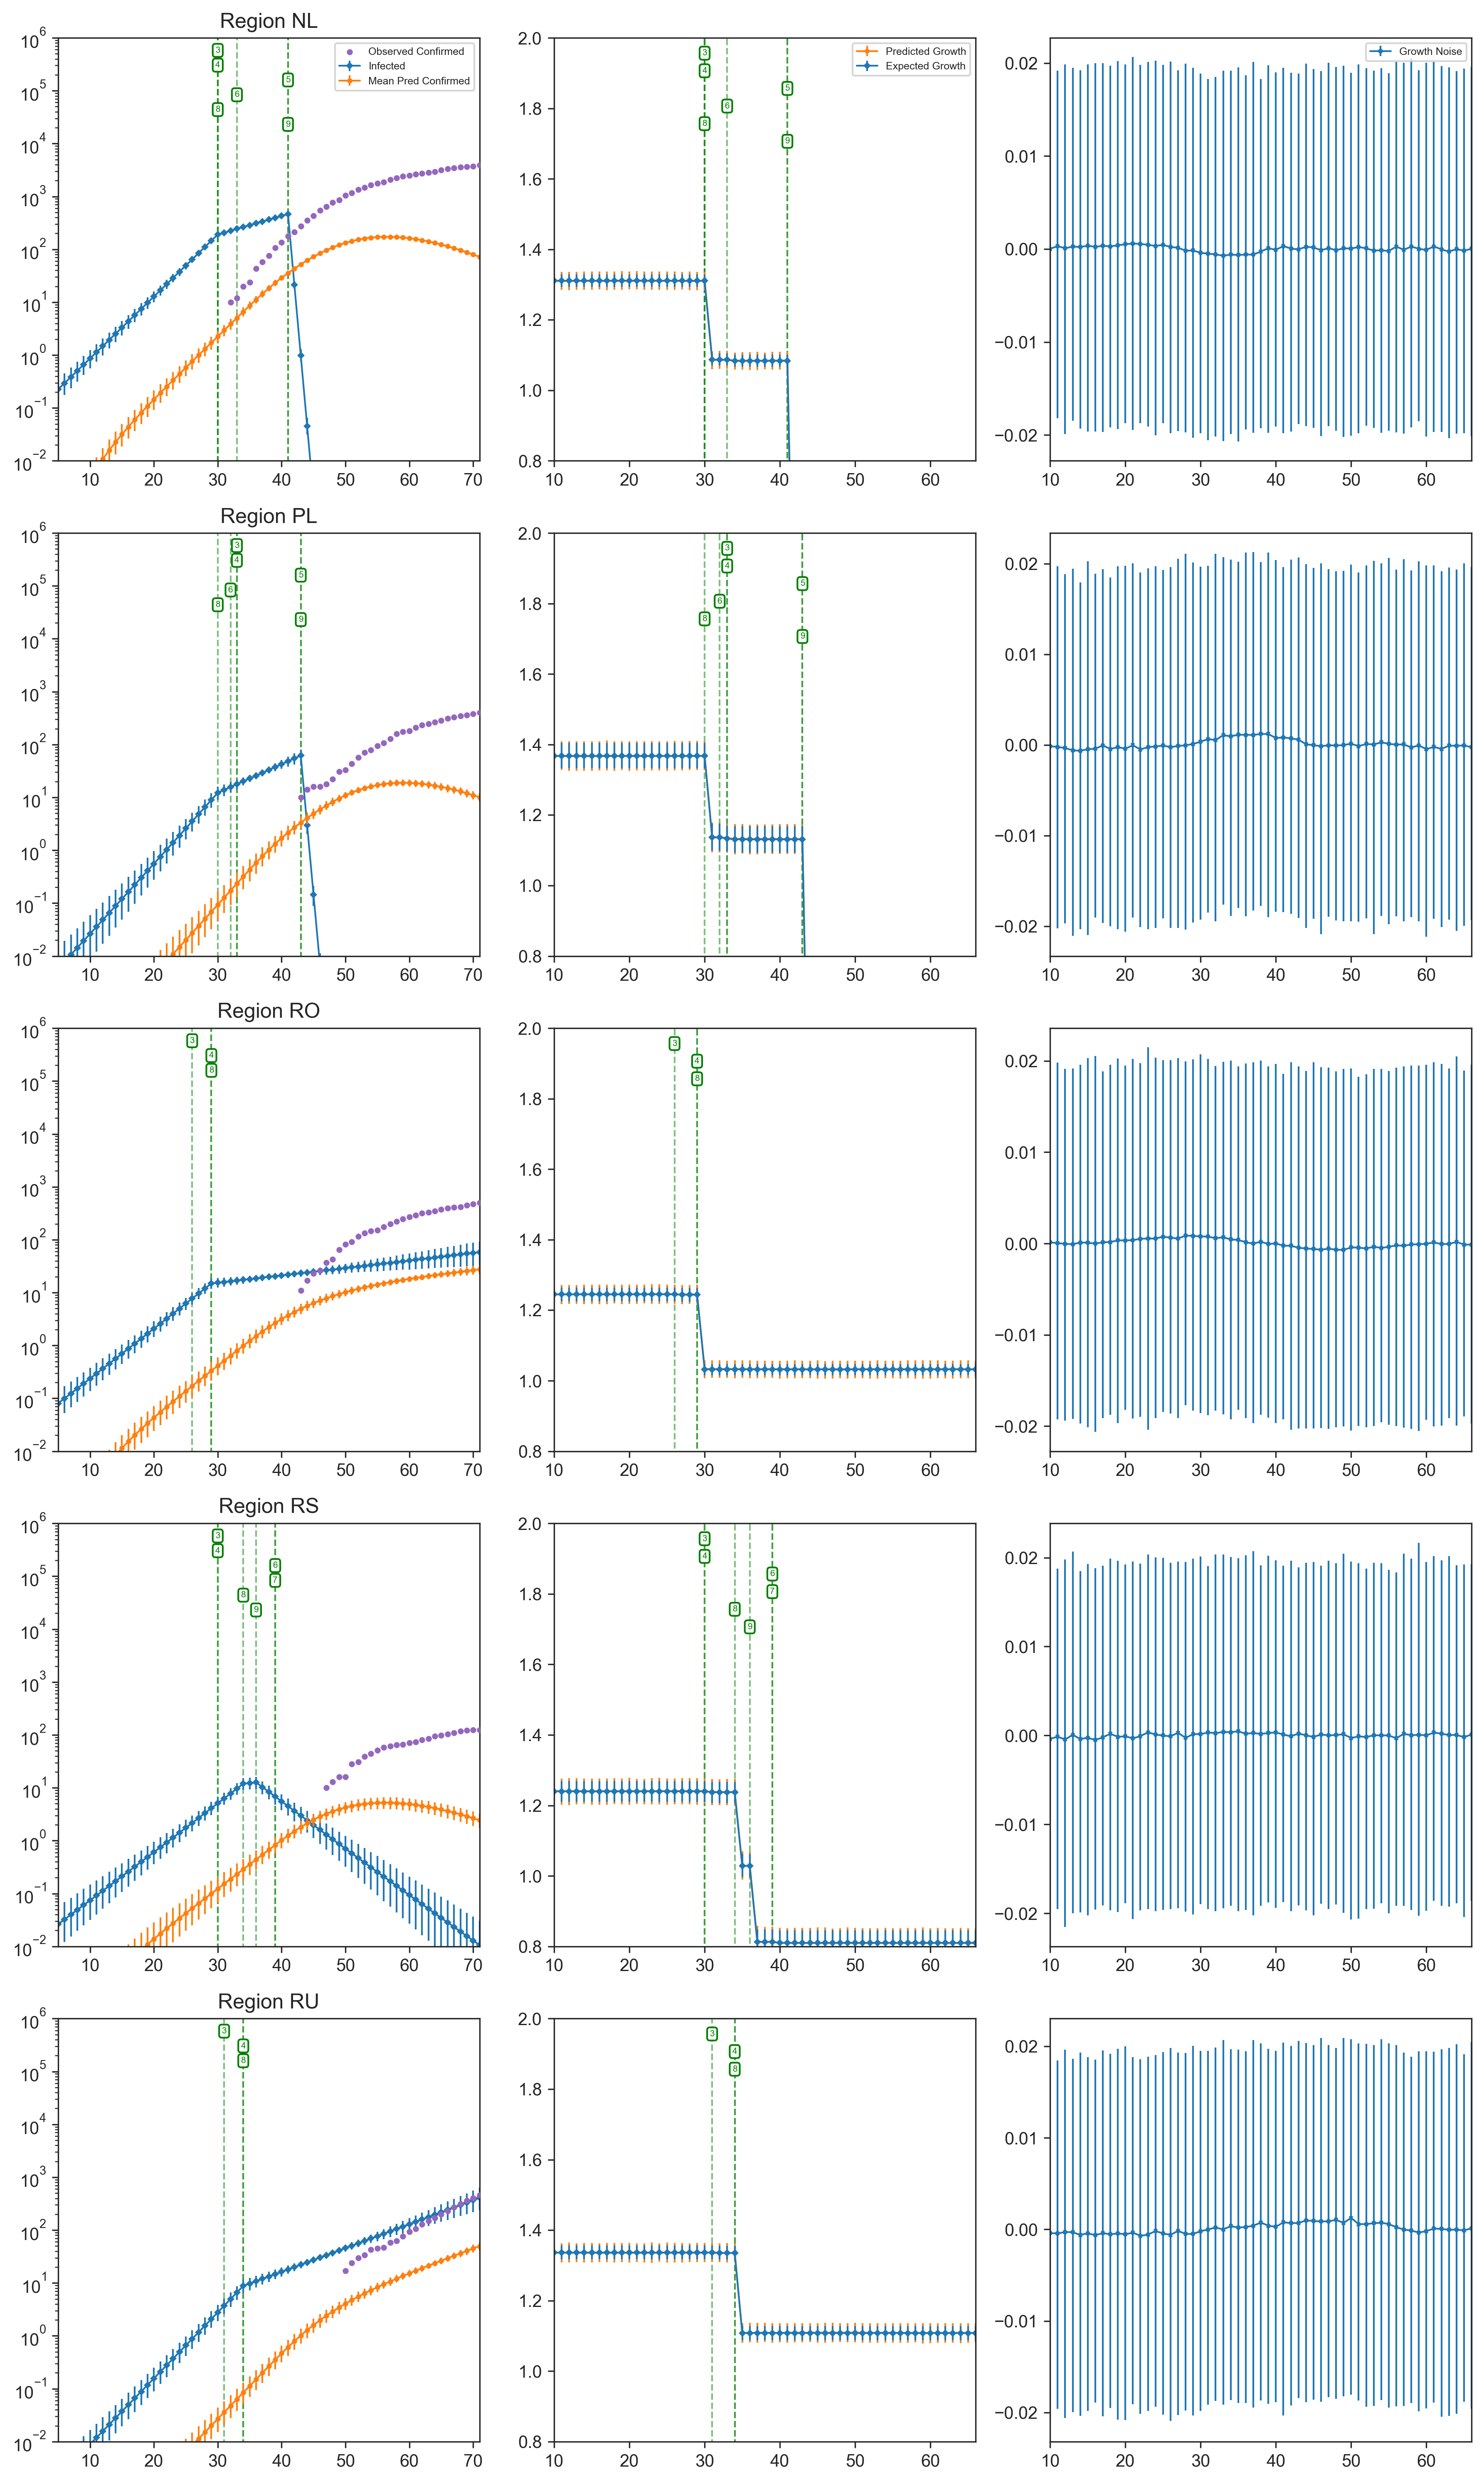

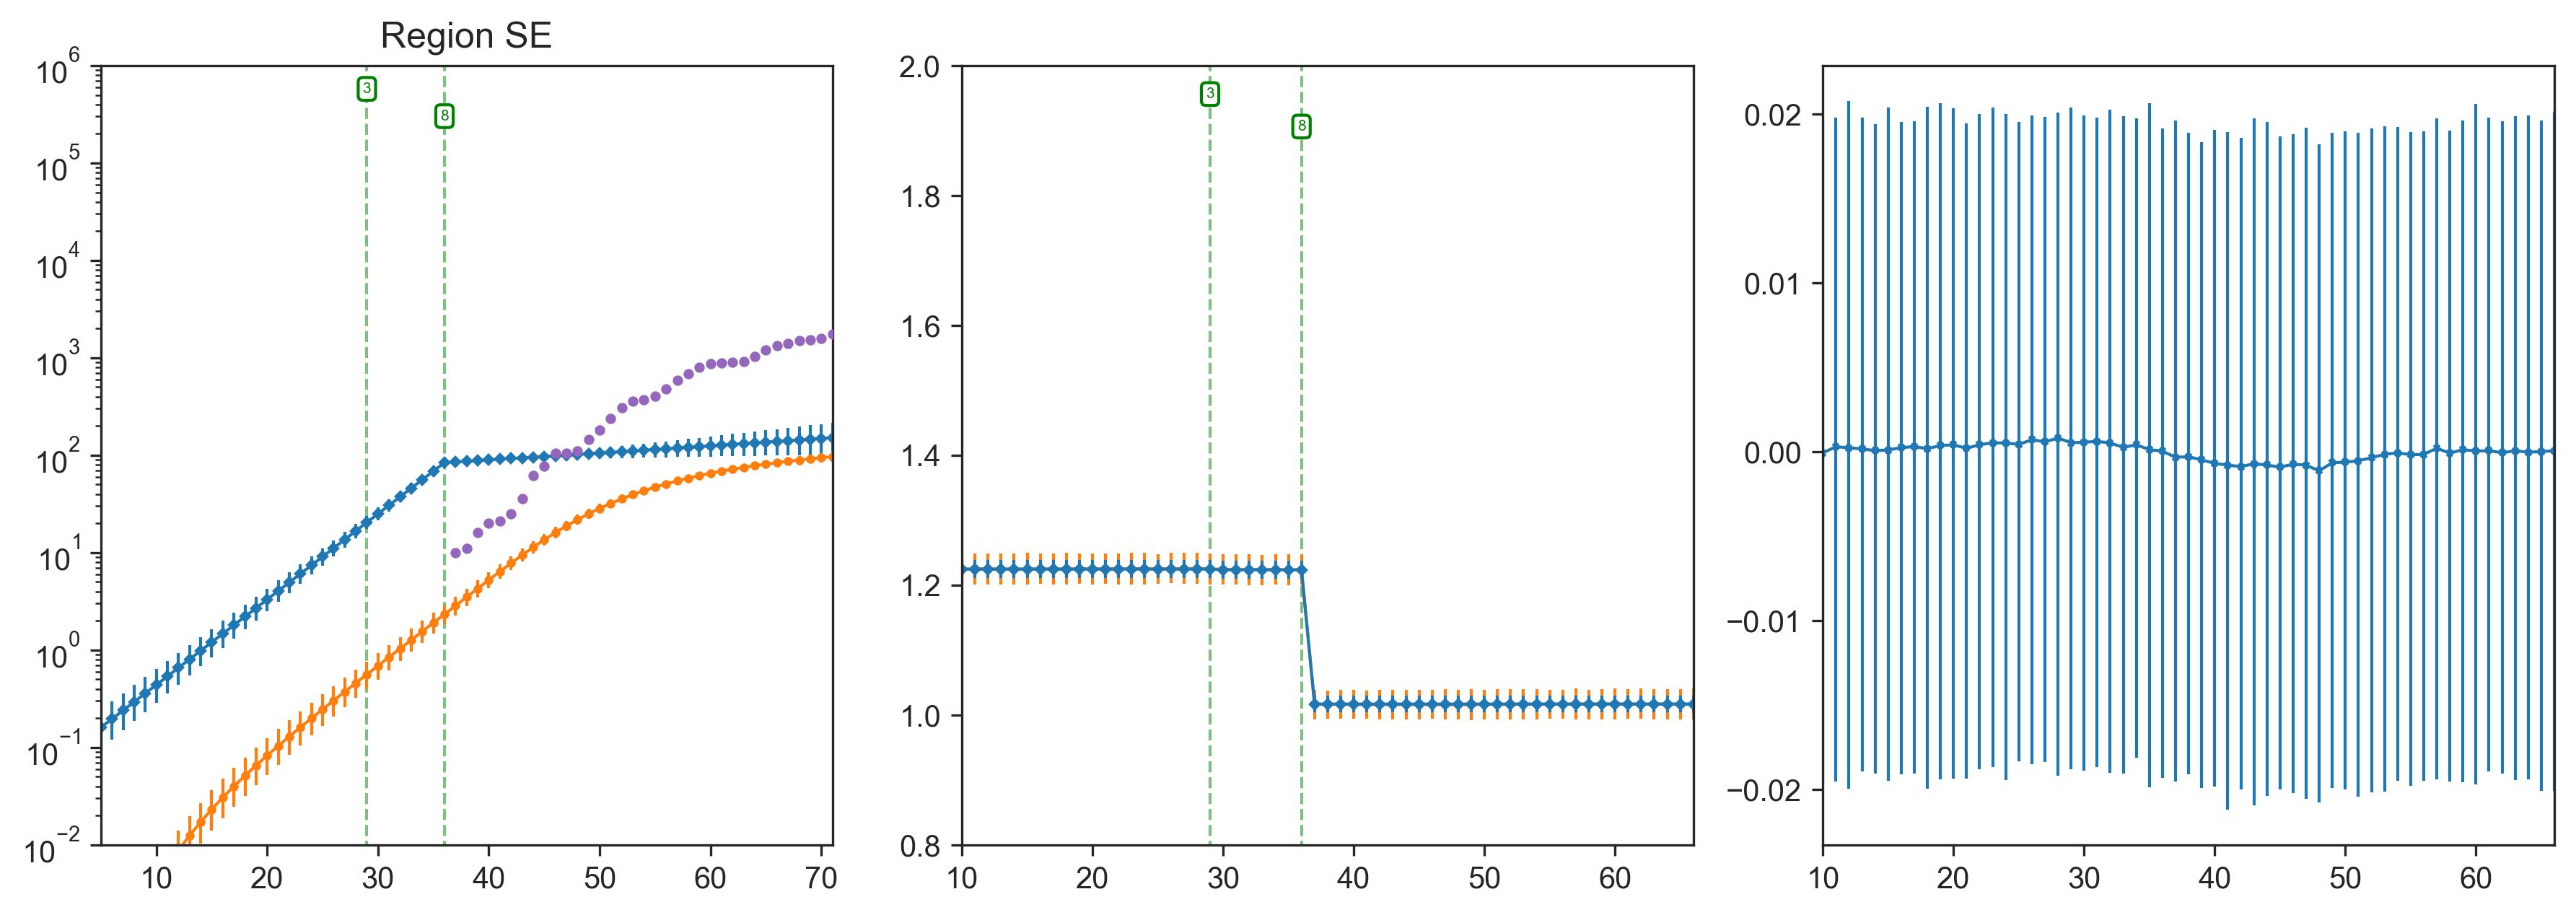

In [135]:
model.plot_region_predictions()